In [2]:
import pandas as pd
import numpy as np
import math
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
import heapq
%matplotlib notebook

In [3]:
##################### constants
num_movies = 1682
num_features = 19
num_users = 943

In [4]:
###############################  read the user ratings and movie information data ####################
ratings_data =pd.read_csv('F:/Projects/PGM/Movie Recommendation/ml-100k/u_data.csv')
movie_data =pd.read_csv('F:/Projects/PGM/Movie Recommendation/ml-100k/u_items.csv', encoding = "ISO-8859-1")


######################### split the ratings data into train and test sets
ratings_train, ratings_test = train_test_split(ratings_data,test_size=0.20, random_state=42)

ratings_train.index = range(len(ratings_train))
ratings_test.index = range(len(ratings_test))



In [5]:
########################################### Initialize the empty graph ###########################################
conn_graph = nx.Graph() 

################################# create nodes  for movies, features and users  ########################

########## create nodes for users
users = np.unique(ratings_data['user id'])
u_nodes = ["user_" + str(i) for i in users]
u_nodes = pd.DataFrame(u_nodes,index = users)
u_nodes = u_nodes.rename(columns = {0:'n'})


########## create nodes for the movies
movies  = np.unique(ratings_data['item id'])
movie_nodes = ["movie_" + str(i) for i in movies]
movie_nodes = pd.DataFrame(movie_nodes,index = movies)
movie_nodes = movie_nodes.rename(columns = {0:'n'})


########## create nodes for the features
features = np.arange(1,20)
f_nodes = ["feature_" + str(i) for i in features]
f_nodes = pd.DataFrame(f_nodes,index = features)
f_nodes = f_nodes.rename(columns = {0:'n'})


######## user ratings matrix - complete data
user_rat_mat_comp = np.ndarray((num_users,num_movies))

for i in range(0,len(ratings_data)):
  r = ratings_data['user id'][i]
  c = ratings_data['item id'][i]
  user_rat_mat_comp[(r-1),(c-1)] = ratings_data['rating'][i]
user_rat_mat_comp = pd.DataFrame(user_rat_mat_comp)


#################### connect nodes in the graph #############################
for usr in range(0,len(user_rat_mat_comp)): 
  for mvi in range(0,len(user_rat_mat_comp.columns)):
      if(user_rat_mat_comp.ix[usr,mvi] > 0):
            conn_graph.add_edge((u_nodes['n'][usr+1]),(movie_nodes['n'][mvi+1]),weight = user_rat_mat_comp.ix[usr,mvi])


for mvi in range(0,len(movie_feat_mat)): 
  for feat in range(0,len(movie_feat_mat.columns)):
      if(movie_feat_mat.ix[mvi,feat] > 0):
            conn_graph.add_edge((movie_nodes['n'][mvi+1]),(f_nodes['n'][feat+1]))

In [24]:
spring_pos = nx.spring_layout(conn_graph, k = 0.5 ,iterations = 70)

<IPython.core.display.Javascript object>


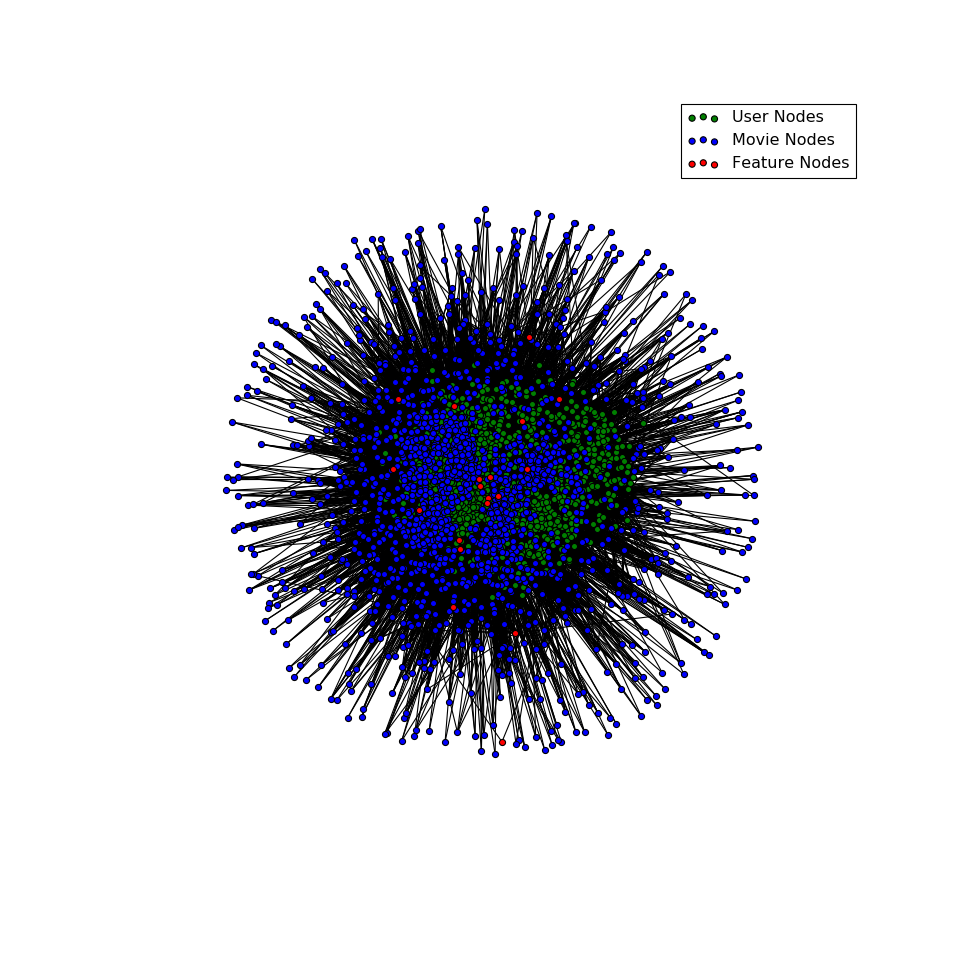

In [66]:
usernodes = [node for node in conn_graph.nodes() if "user" in node]
movienodes = [node for node in conn_graph.nodes() if "movie" in node]
featnodes = [node for node in conn_graph.nodes() if "feature" in node]

fig = plt.figure(figsize=(12, 12)) 
plt.axis("off")

nx.draw_networkx_nodes(conn_graph,pos=spring_pos,nodelist=usernodes, node_color='green', label='User Nodes', node_size = 30)
nx.draw_networkx_nodes(conn_graph,pos=spring_pos,nodelist=movienodes, node_color='blue', label='Movie Nodes', node_size = 30)
nx.draw_networkx_nodes(conn_graph,pos=spring_pos,nodelist=featnodes, node_color='red', label='Feature Nodes', node_size = 30)

nx.draw_networkx_edges(conn_graph, pos = spring_pos)
plt.legend(numpoints = 1)


In [27]:
########Quick snapshot of the Network
print (nx.info(conn_graph))

Name: 
Type: Graph
Number of nodes: 2644
Number of edges: 102893
Average degree:  77.8313


In [26]:
from matplotlib import pyplot, patches

In [28]:
matrix = np.matrix(user_rat_mat_comp)


<IPython.core.display.Javascript object>


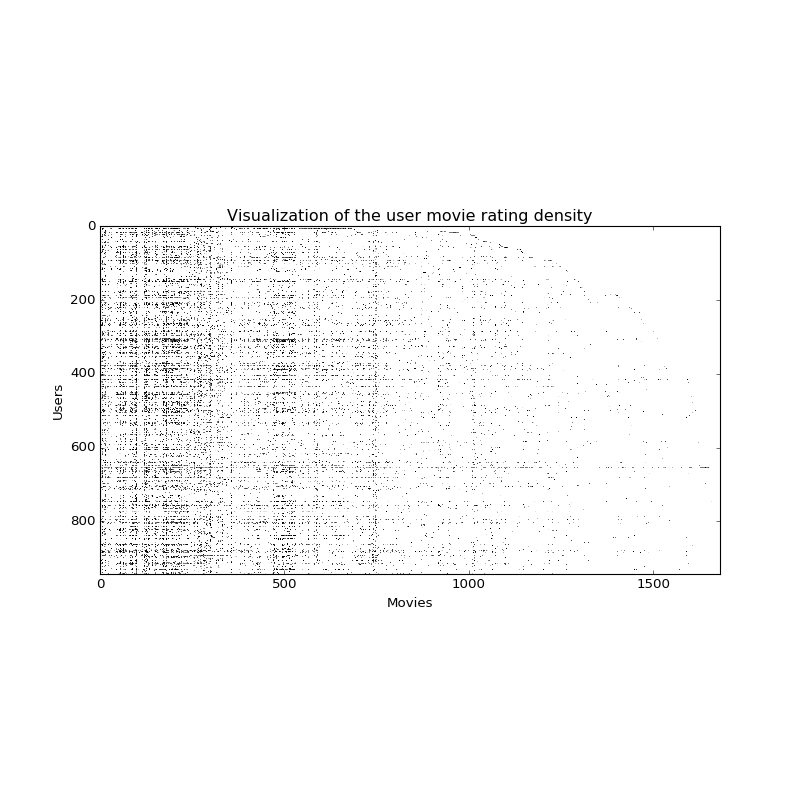

In [70]:
######## Visualize the user movie rating density
fig = pyplot.figure(figsize=(10, 10)) 
pyplot.xlabel("Movies")
pyplot.ylabel("Users")
pyplot.title("Visualization of the user movie rating density")
pyplot.imshow(matrix,cmap="Greys",interpolation="none")


<IPython.core.display.Javascript object>


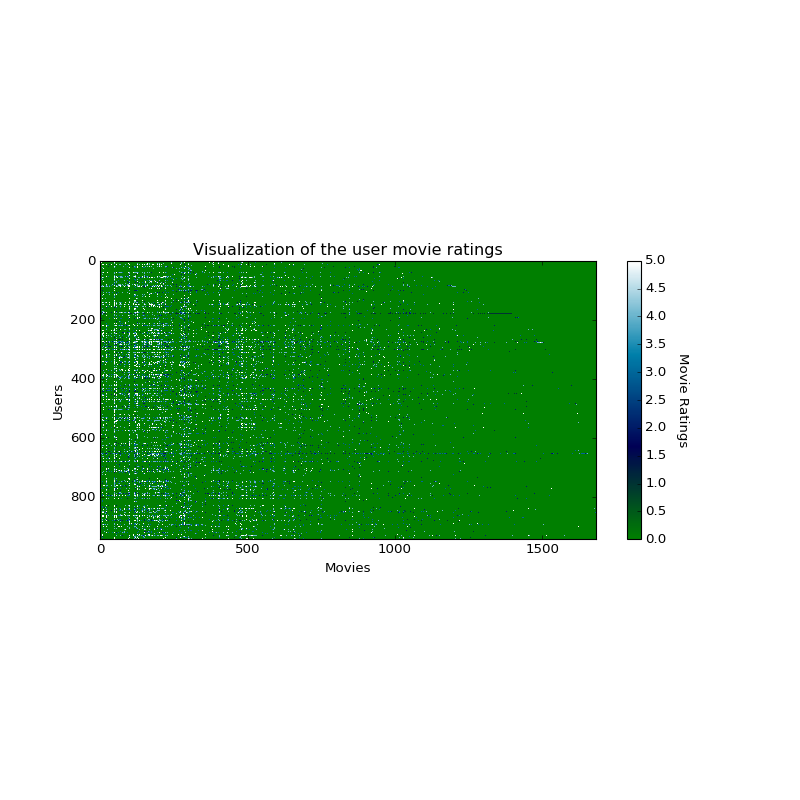

In [53]:
######## Visualize the user movie ratings
fig = pyplot.figure(figsize=(10, 10)) 
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
pyplot.xlabel("Movies")
pyplot.ylabel("Users")
pyplot.title("Visualization of the user movie ratings")
pyplot.imshow(matrix,interpolation='nearest', cmap=pyplot.cm.ocean)
cbar = pyplot.colorbar(fraction = 0.15 , shrink = 0.435)
cbar.set_label('Movie Ratings', rotation=270, labelpad = 20)


<IPython.core.display.Javascript object>


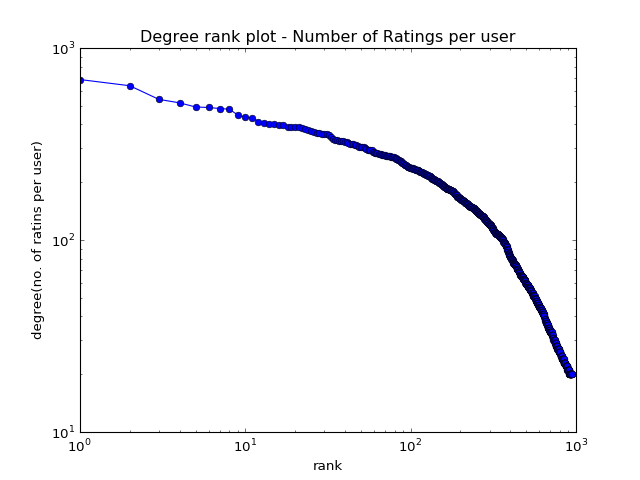

In [85]:
########### Degree rank plot for the user - number of ratings 

degree_sequence=sorted(conn_graph.degree(usernodes).values(),reverse=True) # degree sequence
#print "Degree sequence", degree_sequence
dmax=max(degree_sequence)
fig = plt.figure()
plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot - Number of Ratings per user")
plt.ylabel("degree(no. of ratins per user)")
plt.xlabel("rank")

<IPython.core.display.Javascript object>


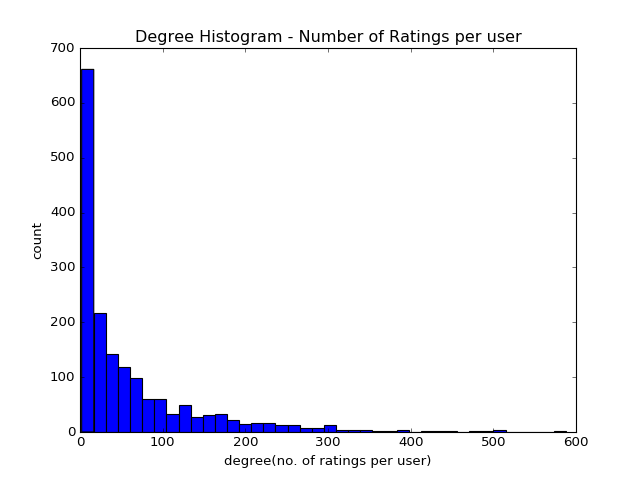

In [84]:
############# Degree histogram for user - number of ratings
fig = plt.figure()
plt.hist(degree_sequence, bins = 40)
plt.title("Degree Histogram - Number of Ratings per user")
plt.ylabel("count")
plt.xlabel("degree(no. of ratings per user)")

<IPython.core.display.Javascript object>


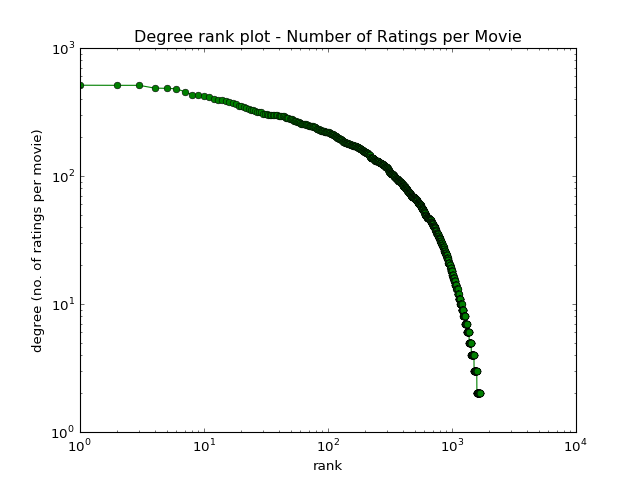

In [82]:
########### Degree rank plot for the movie - number of ratings

degree_sequence=sorted(conn_graph.degree(movienodes).values(),reverse=True) # degree sequence
#print "Degree sequence", degree_sequence
dmax=max(degree_sequence)
fig = plt.figure()
plt.loglog(degree_sequence,'g-',marker='o')
plt.title("Degree rank plot - Number of Ratings per Movie")
plt.ylabel("degree (no. of ratings per movie)")
plt.xlabel("rank")

<IPython.core.display.Javascript object>


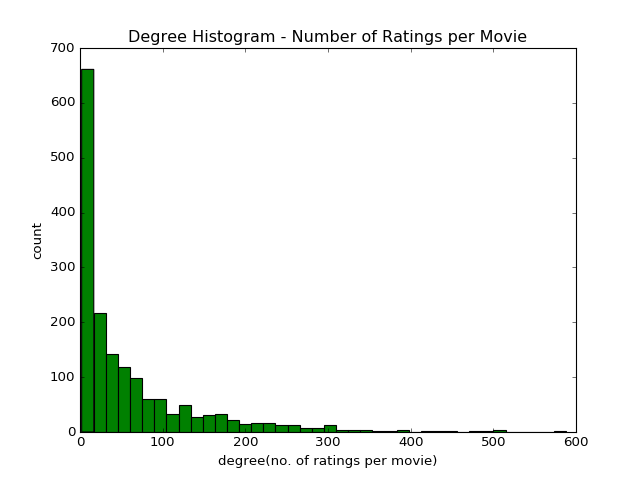

In [83]:
############# Degree histogram for movies - number of ratings
fig = plt.figure()
plt.hist(degree_sequence, bins = 40, color = 'green')
plt.title("Degree Histogram - Number of Ratings per Movie")
plt.ylabel("count")
plt.xlabel("degree(no. of ratings per movie)")

<IPython.core.display.Javascript object>


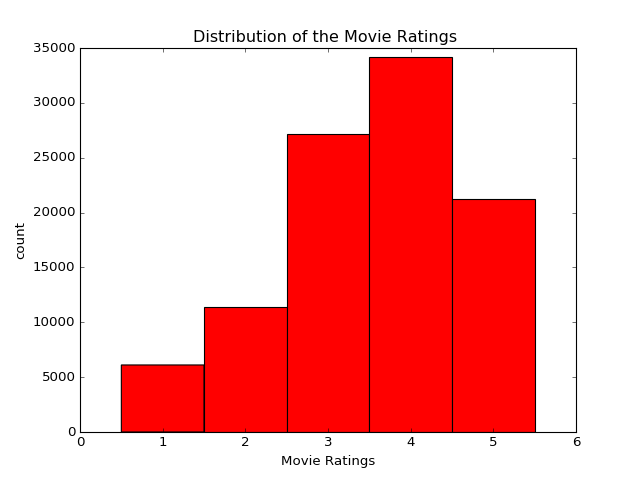

In [17]:
############ visualize the distribution of the ratings
fig = plt.figure()

data = ratings_data['rating']
plt.hist(data , bins=np.arange(data.min(), data.max()+2)-0.5, color = 'red')
plt.title("Distribution of the Movie Ratings ")
plt.ylabel("count")
plt.xlabel("Movie Ratings")